In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
train_data.ndim

1

In [4]:
 len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [7]:
train_labels[10]

3

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [9]:
print(x_train.shape)

(8982, 10000)


In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
one_hot_train_labels.shape

(8982, 46)

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])


In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 180us/step - loss: 2.5315 - acc: 0.4955 - val_loss: 1.7206 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 155us/step - loss: 1.4456 - acc: 0.6885 - val_loss: 1.3465 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 159us/step - loss: 1.0961 - acc: 0.7650 - val_loss: 1.1720 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 1s 154us/step - loss: 0.8706 - acc: 0.8155 - val_loss: 1.0766 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 156us/step - loss: 0.7042 - acc: 0.8477 - val_loss: 0.9854 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 159us/step - loss: 0.5685 - acc: 0.8792 - val_loss: 0.9404 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 160us/step - loss: 0.4611 - acc: 0.9034 - val_loss: 0.9089 - val_acc: 0.8000


7982/7982 [==============================] - 1s 152us/step - loss: 0.3046 - acc: 0.9313 - val_loss: 0.8917 - val_acc: 0.8040
Epoch 10/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.2548 - acc: 0.9416 - val_loss: 0.9060 - val_acc: 0.8140
Epoch 11/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.2188 - acc: 0.9469 - val_loss: 0.9175 - val_acc: 0.8130
Epoch 12/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.1874 - acc: 0.9510 - val_loss: 0.9072 - val_acc: 0.8120
Epoch 13/20
7982/7982 [==============================] - 1s 155us/step - loss: 0.1702 - acc: 0.9519 - val_loss: 0.9310 - val_acc: 0.8110
Epoch 14/20
7982/7982 [==============================] - 1s 160us/step - loss: 0.1535 - acc: 0.9557 - val_loss: 0.9675 - val_acc: 0.8070
Epoch 15/20
7982/7982 [==============================] - 1s 158us/step - loss: 0.1389 - acc: 0.9562 - val_loss: 0.9680 - val_acc: 0.8130
Epoch 16/20
7982/7982 [==============================

7982/7982 [==============================] - 1s 160us/step - loss: 0.1198 - acc: 0.9579 - val_loss: 1.0390 - val_acc: 0.8060
Epoch 19/20
7982/7982 [==============================] - 1s 160us/step - loss: 0.1139 - acc: 0.9595 - val_loss: 1.0964 - val_acc: 0.7980
Epoch 20/20
7982/7982 [==============================] - 1s 160us/step - loss: 0.1113 - acc: 0.9593 - val_loss: 1.0653 - val_acc: 0.8020


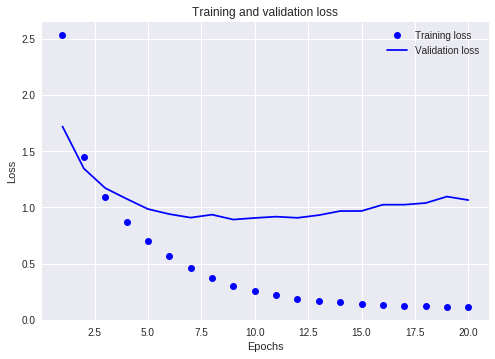

In [16]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

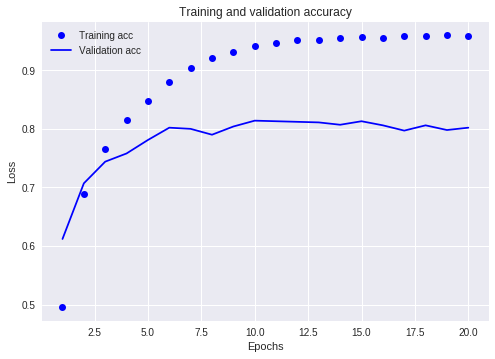

In [17]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
predict=model.predict(x_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 186us/step - loss: 2.5312 - acc: 0.5237 - val_loss: 1.6799 - val_acc: 0.6550
Epoch 2/9
7982/7982 [==============================] - 1s 160us/step - loss: 1.3719 - acc: 0.7124 - val_loss: 1.2796 - val_acc: 0.7240
Epoch 3/9
7982/7982 [==============================] - 1s 157us/step - loss: 1.0146 - acc: 0.7803 - val_loss: 1.1364 - val_acc: 0.7510
Epoch 4/9
7982/7982 [==============================] - 1s 155us/step - loss: 0.7991 - acc: 0.8246 - val_loss: 1.0542 - val_acc: 0.7570
Epoch 5/9
7982/7982 [==============================] - 1s 147us/step - loss: 0.6404 - acc: 0.8622 - val_loss: 0.9738 - val_acc: 0.7960
Epoch 6/9
7982/7982 [==============================] - 1s 148us/step - loss: 0.5120 - acc: 0.8924 - val_loss: 0.9099 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 147us/step - loss: 0.4118 - acc: 0.9148 - val_loss: 0.8937 - val_acc: 0.8220
Epoch 8

2246/2246 [==============================] - 0s 182us/step


In [19]:
results

[1.0201264998791797, 0.7773820125196835]

In [23]:
np.argmax(predict[0])

3